## Data Processing

In [1]:
import pandas as pd
import math 
import random
import numpy as np
import itertools as itt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy import median
from sklearn.metrics import f1_score
from scipy import stats
from scipy.stats import norm
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_hastie_10_2
import warnings 


Bad key "text.kerning_factor" on line 4 in
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('Fannie/2018Q1/d60_90_flag.csv')

In [87]:
df.columns

Index(['loan_identifier', 'origination_channel', 'seller_name',
       'original_interest_rate', 'original_upb', 'original_loan_term',
       'origination_date', 'first_payment_date', 'original_ltv',
       'original_cltv', 'number_of_borrowers', 'original_dti',
       'borrower_credit_score_orig', 'first_time_home_buyer', 'loan_purpose',
       'property_type', 'number_of_units', 'occupancy_type', 'property_state',
       'zip_code_short', 'primary_mortgage_insurance_percent', 'product_type',
       'coborrower_credit_score_orig', 'mortgage_insurance_type',
       'relocation_mortgage', 'd90_flag', 'd60_flag'],
      dtype='object')

In [6]:
df.shape

(426207, 27)

In [3]:
df = df.drop(columns=['loan_identifier','seller_name','d60_flag',
                      'first_payment_date','origination_date',
                     'property_state','zip_code_short'])

In [4]:
df['loan_credit_score_orig'] = df.apply(lambda x: min(x['borrower_credit_score_orig'],x['coborrower_credit_score_orig']), axis=1)

In [5]:
df[['borrower_credit_score_orig','coborrower_credit_score_orig','loan_credit_score_orig']]

,borrower_credit_score_orig,coborrower_credit_score_orig,loan_credit_score_orig
0,791.0,NaN,791.0
1,736.0,793.0,736.0
2,696.0,665.0,665.0
3,767.0,NaN,767.0
4,727.0,NaN,727.0
...,...,...,...
426202,753.0,722.0,722.0
426203,747.0,NaN,747.0
426204,731.0,NaN,731.0
426205,774.0,767.0,767.0


In [95]:
# Columns Statistics
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize = True)) 
    # the object returned will contain the relative frequencies of the unique values.
    print()

origination_channel
R    0.565312
C    0.343345
B    0.091343
Name: origination_channel, dtype: float64

original_interest_rate
4.250    0.152229
3.875    0.104728
4.375    0.097077
4.125    0.081993
4.000    0.080989
           ...   
4.216    0.000002
4.894    0.000002
4.422    0.000002
4.453    0.000002
3.572    0.000002
Name: original_interest_rate, Length: 967, dtype: float64

original_upb
424000     0.013125
200000     0.012442
100000     0.010936
453000     0.010202
150000     0.010131
             ...   
949000     0.000002
848000     0.000002
1170000    0.000002
13000      0.000002
914000     0.000002
Name: original_upb, Length: 836, dtype: float64

original_loan_term
360    0.785872
180    0.123780
240    0.063296
120    0.014118
300    0.006441
         ...   
224    0.000002
227    0.000002
230    0.000002
170    0.000002
261    0.000002
Name: original_loan_term, Length: 138, dtype: float64

original_ltv
80    0.212782
95    0.095740
75    0.070757
97    0.057176
90    0.05

In [96]:
df.isnull().sum() # check null values

origination_channel                        0
original_interest_rate                     0
original_upb                               0
original_loan_term                         0
original_ltv                               0
original_cltv                              1
number_of_borrowers                        0
original_dti                             111
borrower_credit_score_orig               336
first_time_home_buyer                      0
loan_purpose                               0
property_type                              0
number_of_units                            0
occupancy_type                             0
primary_mortgage_insurance_percent    312107
product_type                               0
coborrower_credit_score_orig          235424
mortgage_insurance_type               312107
relocation_mortgage                        0
d90_flag                                   0
loan_credit_score_orig                   336
dtype: int64

In [6]:
df = df.drop(columns=['primary_mortgage_insurance_percent','borrower_credit_score_orig','coborrower_credit_score_orig',
                     'mortgage_insurance_type','product_type'])

In [7]:
df.dropna(axis=0, how='any',inplace=True)

In [99]:
df.isnull().sum()

origination_channel       0
original_interest_rate    0
original_upb              0
original_loan_term        0
original_ltv              0
original_cltv             0
number_of_borrowers       0
original_dti              0
first_time_home_buyer     0
loan_purpose              0
property_type             0
number_of_units           0
occupancy_type            0
relocation_mortgage       0
d90_flag                  0
loan_credit_score_orig    0
dtype: int64

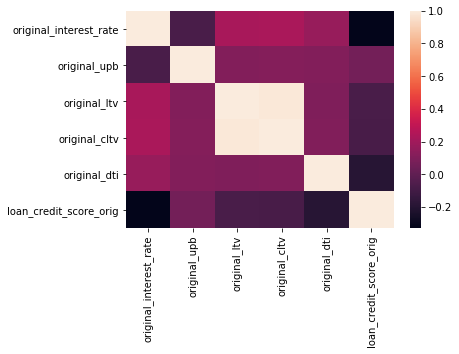

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt 
continous_cols = ['original_interest_rate', 'original_upb','original_ltv',
       'original_cltv','original_dti','loan_credit_score_orig']

# calculate and plot
corr_matrix = df[continous_cols ].corr()
sns.heatmap(corr_matrix)

In [8]:
df = df.drop(columns = ['original_ltv'])

In [9]:
df['number_of_borrowers'] = df['number_of_borrowers'].apply(lambda x: '1' if x == 1 else '2+')

In [10]:
df['number_of_borrowers'].value_counts()

1     234672
2+    191092
Name: number_of_borrowers, dtype: int64

In [11]:
df['number_of_units'] = df['number_of_units'].apply(lambda x: '1' if x == 1 else '2+')

In [12]:
df['number_of_units'].value_counts()

1     416100
2+      9664
Name: number_of_units, dtype: int64

In [13]:
categorical_cols = ['origination_channel','number_of_borrowers',
                    'first_time_home_buyer', 'loan_purpose', 'property_type', 
                    'number_of_units','occupancy_type', 'relocation_mortgage']

df=pd.get_dummies(df,
                   prefix_sep='_',
                   drop_first=False,
                   columns=categorical_cols)

In [108]:
df.columns

Index(['original_interest_rate', 'original_upb', 'original_loan_term',
       'original_cltv', 'original_dti', 'd90_flag', 'loan_credit_score_orig',
       'origination_channel_B', 'origination_channel_C',
       'origination_channel_R', 'number_of_borrowers_1',
       'number_of_borrowers_2+', 'first_time_home_buyer_N',
       'first_time_home_buyer_U', 'first_time_home_buyer_Y', 'loan_purpose_C',
       'loan_purpose_P', 'loan_purpose_R', 'property_type_CO',
       'property_type_CP', 'property_type_MH', 'property_type_PU',
       'property_type_SF', 'number_of_units_1', 'number_of_units_2+',
       'occupancy_type_I', 'occupancy_type_P', 'occupancy_type_S',
       'relocation_mortgage_N', 'relocation_mortgage_Y'],
      dtype='object')

In [14]:
df = df.drop(columns = ['first_time_home_buyer_N',
       'first_time_home_buyer_U'])

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
df.reset_index(inplace=True, drop = True)
y = df['d90_flag']
X = df.drop(columns = ['d90_flag'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)
model_list = {} #to store the models

In [226]:
df

,original_interest_rate,original_upb,original_loan_term,original_cltv,original_dti,d90_flag,loan_credit_score_orig,origination_channel_B,origination_channel_C,origination_channel_R,...,property_type_MH,property_type_PU,property_type_SF,number_of_units_1,number_of_units_2+,occupancy_type_I,occupancy_type_P,occupancy_type_S,relocation_mortgage_N,relocation_mortgage_Y
0,4.25,453000,360,65.0,28.0,0,791.0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,4.25,266000,360,80.0,41.0,0,736.0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
2,3.99,233000,360,79.0,48.0,0,665.0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
3,4.25,184000,360,80.0,48.0,0,767.0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
4,4.25,242000,360,49.0,22.0,0,727.0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425759,4.25,113000,360,62.0,15.0,0,722.0,0,0,1,...,0,0,1,1,0,0,1,0,1,0
425760,3.75,318000,360,95.0,44.0,0,747.0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
425761,4.00,178000,360,80.0,47.0,0,731.0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
425762,4.25,128000,240,60.0,37.0,0,767.0,0,0,1,...,0,0,1,1,0,0,1,0,1,0


In [16]:
model_list = {}

## Build Model

#### Logistic Model

In [24]:
%%time
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
logit_model = LogisticRegression(**grid.best_params_)
logit_model.fit(X_train, y_train)
model_list['logit_model'] = logit_model

{'C': 1}
CPU times: user 17.5 s, sys: 1.27 s, total: 18.7 s
Wall time: 17.5 s


#### Logistic model with spline

In [51]:
df_sp = df.copy()

In [52]:
# Create Splines
df_sp['original_interest_rate_4.1'] = df_sp['original_interest_rate'].apply(lambda x: max(x-4.1,0))
df_sp['original_interest_rate_5.0'] = df_sp['original_interest_rate'].apply(lambda x: max(x-5.0,0))

df_sp['original_cltv_85'] = df_sp['original_cltv'].apply(lambda x: max(x-85,0))
df_sp['original_cltv_95'] = df_sp['original_cltv'].apply(lambda x: max(x-95,0))

df_sp['loan_credit_score_orig_695'] = df_sp['loan_credit_score_orig'].apply(lambda x: max(x-695,0))
df_sp['loan_credit_score_orig_720'] = df_sp['loan_credit_score_orig'].apply(lambda x: max(x-720,0))


In [53]:
y_sp = df_sp['d90_flag']
X_sp = df_sp.drop(columns = ['d90_flag'])
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X_sp, y_sp, test_size=0.3, random_state= 42)

In [54]:
%%time
param_grid = {'C': [0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train_sp, y_train_sp)
print(grid.best_params_)
logit_model_sp = LogisticRegression(**grid.best_params_)
logit_model_sp.fit(X_train_sp, y_train_sp)
model_list['logit_model_sp'] = logit_model_sp

{'C': 1}
CPU times: user 23.7 s, sys: 1.1 s, total: 24.8 s
Wall time: 22.4 s


/Users/jingsixu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Logistic model with dummy buckets

In [55]:
df_dm = df.copy()

#### Random Forest

In [22]:
%%time
from sklearn.ensemble import RandomForestClassifier
param_grid = {'max_depth': [2,4,6,8], "n_estimators": [100,200,300,500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
rf_model = RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train, y_train)
model_list['rf_model'] = rf_model

{'max_depth': 8, 'n_estimators': 500}
CPU times: user 19min 38s, sys: 27 s, total: 20min 5s
Wall time: 20min 39s


#### xgboost

In [23]:
%%time
from xgboost import XGBClassifier
param_grid = {"learning_rate": [0.01, 0.1,0.5], "n_estimators": [100,300,500], 'max_depth':[3,4,5]}
grid = GridSearchCV(XGBClassifier(), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print("best hyperparameters through grid search: ", grid.best_params_)
xgb_model = XGBClassifier(**grid.best_params_)
xgb_model.fit(X_train, y_train)
model_list['xgb_model'] = xgb_model

best hyperparameters through grid search:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
CPU times: user 2h 20min 27s, sys: 59.2 s, total: 2h 21min 26s
Wall time: 2h 24min


#### SVM

In [17]:
from sklearn import preprocessing
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [18]:
X_train_nor, X_test_nor, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state= 42)

In [19]:
normalized_X.shape

(425764, 27)

In [20]:
%%time
from sklearn import svm
from sklearn.svm import SVC  
param_grid = {'C': [0.1,1,10], 'gamma': [1,0.1,0.01]}
grid = GridSearchCV(SVC(probability=True),param_grid, cv = 3, refit=True,verbose=2)
grid.fit(X_train_nor,y_train)
print("best hyperparameters through grid search: ", grid.best_params_)
#svm_model = SVC(**grid.best_params_)
#svm_model.fit(X_train, y_train)
#model_list['svm_model'] = svm_model

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total= 4.2min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.2min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 4.2min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 4.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 4.2min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 4.4min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total= 4.6min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total= 4.6min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total= 4.6min
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed: 118.0min finished


best hyperparameters through grid search:  {'C': 0.1, 'gamma': 1}
CPU times: user 2h 3min 36s, sys: 1min 16s, total: 2h 4min 53s
Wall time: 2h 8min 52s


In [21]:
svm_model = SVC(**grid.best_params_, probability=True)
svm_model.fit(X_train_nor, y_train)
model_list['svm_model'] = svm_model

## Model Validation

### In the sample validation

#### logit model

In [31]:
def prob(a):
    prob = 1 / (1 + math.exp(-a))
    return prob

predict = X * logit_model.coef_

predict['prob'] = pd.DataFrame(logit_model.predict_proba(X))[1]

predict['self_cal'] = predict.apply(sum, axis = 1)
predict['self_cal'] = predict['self_cal']+float(logit_model.intercept_)
predict['self_cal'] = predict['self_cal'].apply(prob)

predict['d90_flag'] = y 

In [231]:
predict

,original_interest_rate,original_upb,original_loan_term,original_cltv,original_dti,loan_credit_score_orig,origination_channel_B,origination_channel_C,origination_channel_R,number_of_borrowers_1,...,number_of_units_1,number_of_units_2+,occupancy_type_I,occupancy_type_P,occupancy_type_S,relocation_mortgage_N,relocation_mortgage_Y,prob,self_cal,d90_flag
0,0.000603,-0.463913,4.591183,0.209881,0.043041,-10.327197,0.000000,0.000000,-0.000031,0.000081,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.002609,0.002615,0
1,0.000603,-0.272408,4.591183,0.258315,0.063024,-9.609124,0.000000,0.000032,-0.000000,0.000000,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.006906,0.006953,0
2,0.000567,-0.238613,4.591183,0.255086,0.073785,-8.682157,0.000000,0.000000,-0.000031,0.000000,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.017982,0.018302,0
3,0.000603,-0.188433,4.591183,0.258315,0.073785,-10.013856,0.000000,0.000000,-0.000031,0.000081,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.005076,0.005101,0
4,0.000603,-0.247830,4.591183,0.158218,0.033818,-9.491621,0.000000,0.000000,-0.000031,0.000081,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.006995,0.007044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425759,0.000603,-0.115722,4.591183,0.200194,0.023058,-9.426341,0.000000,0.000000,-0.000031,0.000000,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.008774,0.008851,0
425760,0.000532,-0.325661,4.591183,0.306749,0.067636,-9.752738,0.000002,0.000000,-0.000000,0.000081,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.005987,0.006023,0
425761,0.000568,-0.182288,4.591183,0.258315,0.072248,-9.543844,0.000000,0.000032,-0.000000,0.000081,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.008133,0.008199,0
425762,0.000603,-0.131084,3.060788,0.193736,0.056876,-10.013856,0.000000,0.000000,-0.000031,0.000000,...,0.000005,-0.0,-0.0,0.000024,-0.0,0.000004,-0.0,0.001076,0.001078,0


In [32]:
val_log = pd.concat([X,predict.iloc[:,-3:]],axis = 1)

In [241]:
X.columns

Index(['original_interest_rate', 'original_upb', 'original_loan_term',
       'original_cltv', 'original_dti', 'loan_credit_score_orig',
       'origination_channel_B', 'origination_channel_C',
       'origination_channel_R', 'number_of_borrowers_1',
       'number_of_borrowers_2+', 'first_time_home_buyer_Y', 'loan_purpose_C',
       'loan_purpose_P', 'loan_purpose_R', 'property_type_CO',
       'property_type_CP', 'property_type_MH', 'property_type_PU',
       'property_type_SF', 'number_of_units_1', 'number_of_units_2+',
       'occupancy_type_I', 'occupancy_type_P', 'occupancy_type_S',
       'relocation_mortgage_N', 'relocation_mortgage_Y'],
      dtype='object')

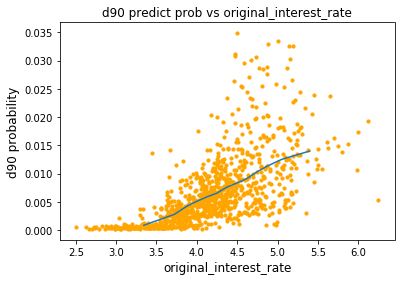

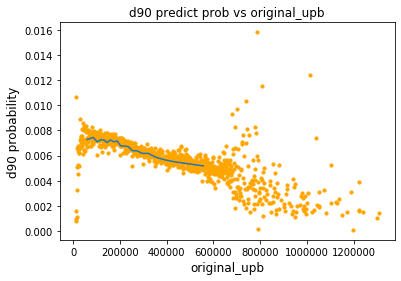

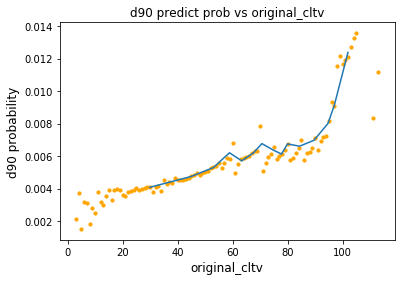

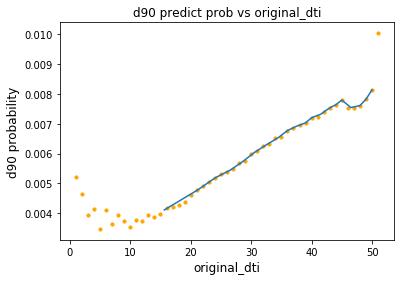

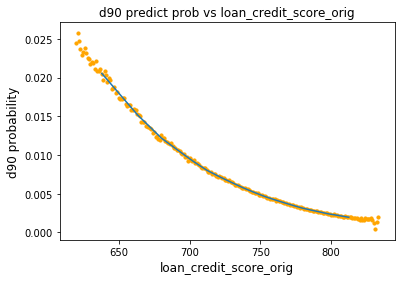

In [242]:
continius = ['original_interest_rate', 'original_upb', 'original_cltv', 
             'original_dti', 'loan_credit_score_orig']
for col in continius:
    plt.subplot(111)
    a = val.groupby(pd.qcut(val[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'])

    b = val.groupby([col],as_index=False)[['prob']].mean()
    plt.scatter(b[col],b['prob'],color='orange', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 predict prob vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 probability',fontsize =12)
    plt.show()

#### logit regression with spline

In [33]:
def prob(a):
    prob = 1 / (1 + math.exp(-a))
    return prob

predict = X_sp * logit_model_sp.coef_

predict['prob'] = pd.DataFrame(logit_model_sp.predict_proba(X_sp))[1]

predict['self_cal'] = predict.apply(sum, axis = 1)
predict['self_cal'] = predict['self_cal']+float(logit_model_sp.intercept_)
predict['self_cal'] = predict['self_cal'].apply(prob)

predict['d90_flag'] = y_sp

In [34]:
val_logsp = pd.concat([X_sp,predict.iloc[:,-3:]],axis = 1)

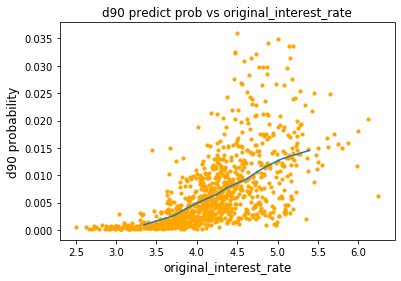

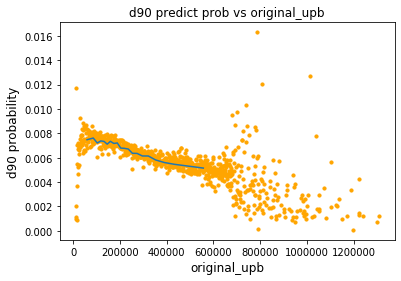

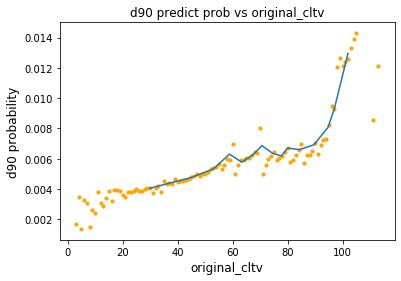

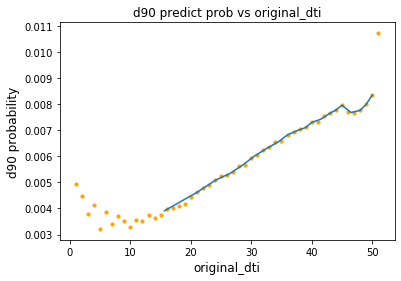

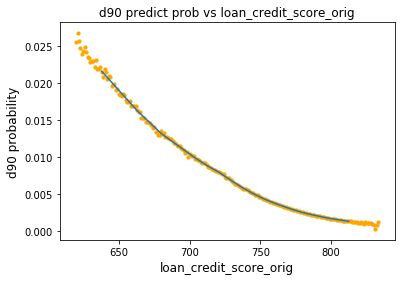

In [333]:
continius = ['original_interest_rate', 'original_upb', 'original_cltv', 
             'original_dti', 'loan_credit_score_orig']
for col in continius:
    plt.subplot(111)
    a = val.groupby(pd.qcut(val[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'])

    b = val.groupby([col],as_index=False)[['prob']].mean()
    plt.scatter(b[col],b['prob'],color='orange', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 predict prob vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 probability',fontsize =12)
    plt.show()

#### Random Forest

In [35]:
val_rf = pd.concat([X,pd.DataFrame(rf_model.predict_proba(X))[[1]]],axis = 1)
val_rf.rename(columns = {1:'prob'}, inplace = True)

#### xgboost

In [36]:
val_xgb = pd.concat([X,pd.DataFrame(xgb_model.predict_proba(X))[[1]]],axis = 1)
val_xgb.rename(columns = {1:'prob'}, inplace = True)

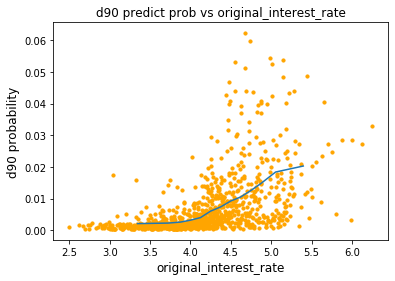

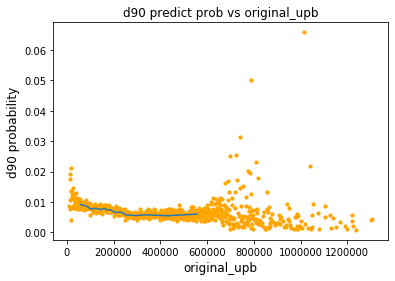

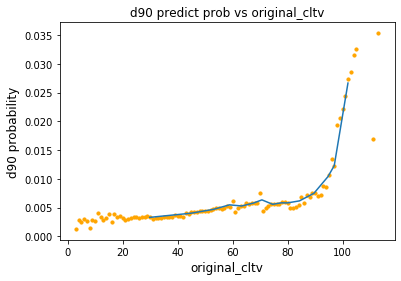

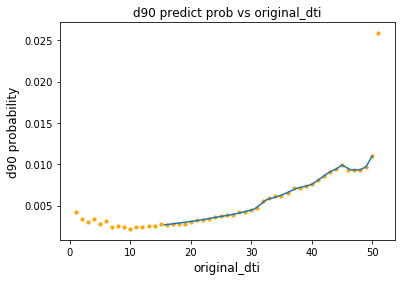

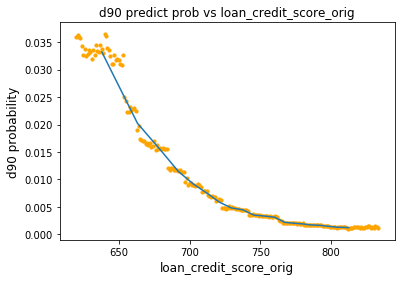

In [336]:
continius = ['original_interest_rate', 'original_upb', 'original_cltv', 
             'original_dti', 'loan_credit_score_orig']
for col in continius:
    plt.subplot(111)
    a = val.groupby(pd.qcut(val[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'])

    b = val.groupby([col],as_index=False)[['prob']].mean()
    plt.scatter(b[col],b['prob'],color='orange', s=10)
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 predict prob vs " + col)
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 probability',fontsize =12)
    plt.show()

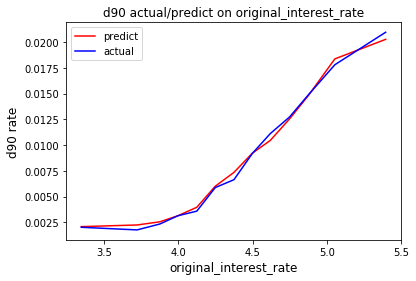

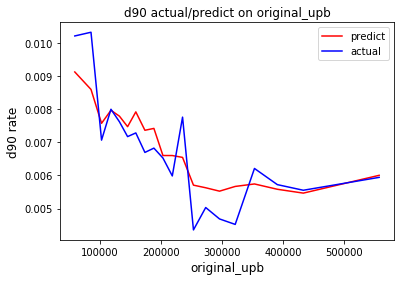

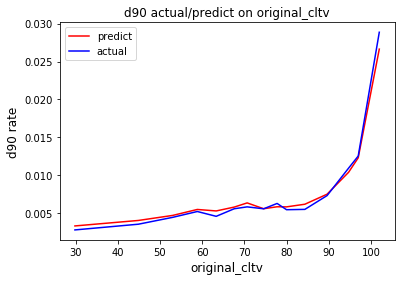

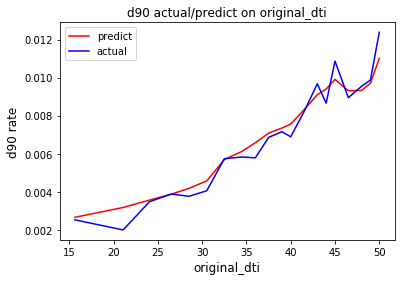

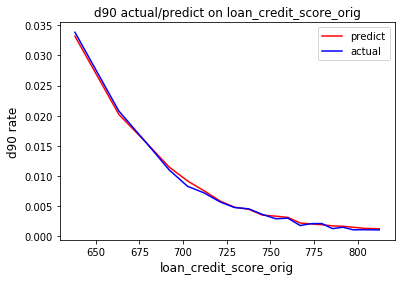

In [353]:
continius = ['original_interest_rate', 'original_upb', 'original_cltv', 
             'original_dti', 'loan_credit_score_orig']
for col in continius:
    plt.subplot(111)
    a = val.groupby(pd.qcut(val[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'], c= 'r', label='predict')

    b = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'd90_flag']].mean()
    plt.plot(b[col],b['d90_flag'], c= 'b', label = 'actual')
    
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("d90 actual/predict on " + col)
    plt.legend()
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 rate',fontsize =12)
    plt.show()

#### SVM

In [29]:
val_svm = pd.concat([X,pd.DataFrame(svm_model.predict_proba(X))[[1]]],axis = 1)
val_svm.rename(columns = {1:'prob'}, inplace = True) 

#### Put together

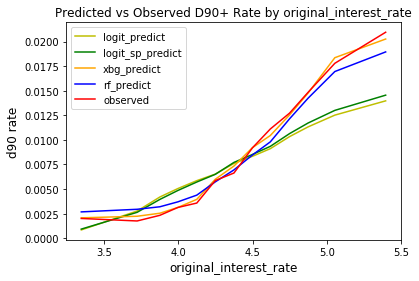

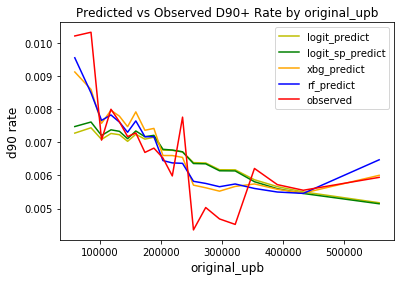

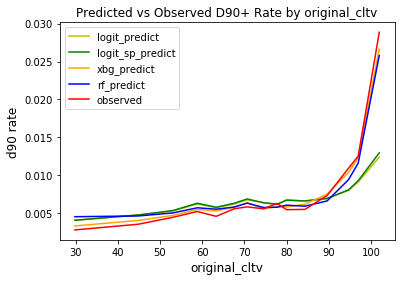

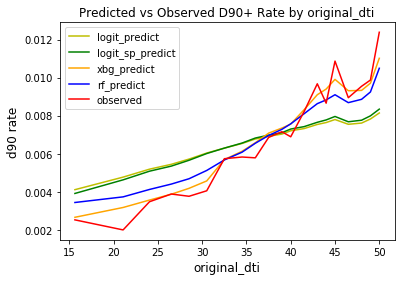

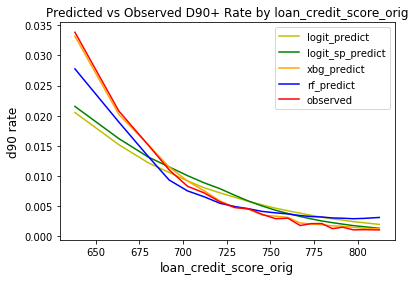

In [44]:
continius = ['original_interest_rate', 'original_upb', 'original_cltv', 
             'original_dti', 'loan_credit_score_orig']
for col in continius:
    plt.subplot(111)
    a = val_log.groupby(pd.qcut(val_log[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(a[col],a['prob'], c= 'y', label='logit_predict')
    
    c = val_logsp.groupby(pd.qcut(val_logsp[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(c[col],c['prob'], c= 'g', label='logit_sp_predict')
    
    d = val_xgb.groupby(pd.qcut(val_xgb[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(d[col],d['prob'], c= 'orange', label='xbg_predict')
    
    e = val_rf.groupby(pd.qcut(val_rf[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    plt.plot(e[col],e['prob'], c= 'b', label='rf_predict')
    
    #f = val_svm.groupby(pd.qcut(val_svm[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
    #plt.plot(f[col],f['prob'], c= 'purple', label='svm_predict') 

    b = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'd90_flag']].mean()
    plt.plot(b[col],b['d90_flag'], c= 'r', label = 'observed')
    
    #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
    plt.title("Predicted vs Observed D90+ Rate by " + col)
    plt.legend()
    plt.xlabel(col, fontsize =12)
    plt.ylabel('d90 rate',fontsize =12)
    plt.savefig("figs/first/d90_vs_" + col + ".png")
    plt.show()
    

In [132]:
def cat_prob(li):
    med = {}
    med['observed'] = []
    med['logit'] = []
    med['logit_sp'] = []
    med['xgb'] = []
    med['rf'] = []
    for i in li:
        med['observed'].append(df.groupby([i],as_index=False)[['d90_flag']].mean().iloc[1,1])
        med['logit'].append(val_log[val_log[i]==1]['prob'].mean())
        med['logit_sp'].append(val_logsp[val_logsp[i]==1]['prob'].mean())
        med['xgb'].append(val_xgb[val_xgb[i]==1]['prob'].mean())
        med['rf'].append(val_rf[val_rf[i]==1]['prob'].mean()) 
        
           
    df_med = pd.DataFrame(med, index=li) 
    
    plt.figure()
    df_med.plot(kind = 'bar',color = ['r','y','g','orange','b'], figsize = (10,5))
    plt.title("Predicted vs Observed D90+ Rate by "+li[0][:-3])
    plt.ylabel('d90 rate',fontsize =12)
    plt.savefig("figs/first/d90_vs_" + li[0][:-3] + ".png")
    plt.show()
    return 


In [49]:
category = [['origination_channel_B', 'origination_channel_C',
       'origination_channel_R'], ['number_of_borrowers_1',
       'number_of_borrowers_2+'], ['first_time_home_buyer_Y'], ['loan_purpose_C',
       'loan_purpose_P', 'loan_purpose_R'], ['property_type_CO',
       'property_type_CP', 'property_type_MH', 'property_type_PU',
       'property_type_SF'], ['number_of_units_1', 'number_of_units_2+'],
       ['occupancy_type_I', 'occupancy_type_P', 'occupancy_type_S'],
       ['relocation_mortgage_N', 'relocation_mortgage_Y']]

<Figure size 432x288 with 0 Axes>

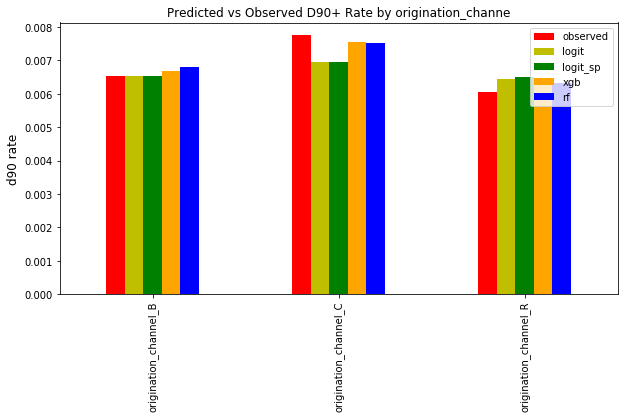

<Figure size 432x288 with 0 Axes>

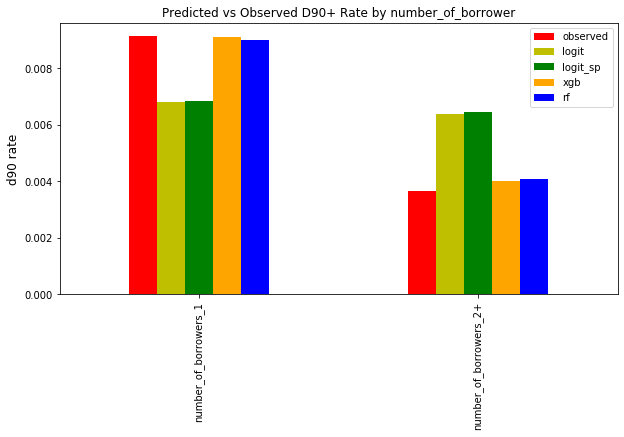

<Figure size 432x288 with 0 Axes>

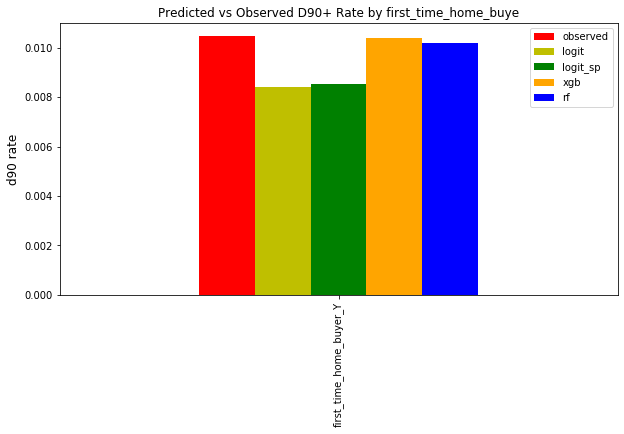

<Figure size 432x288 with 0 Axes>

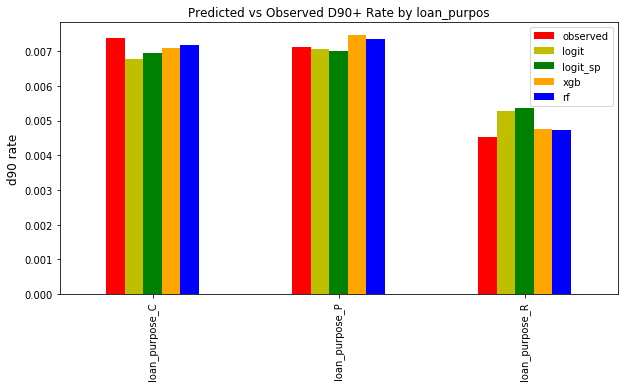

<Figure size 432x288 with 0 Axes>

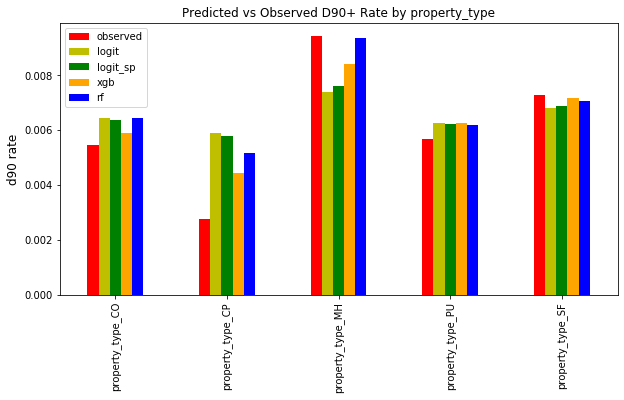

<Figure size 432x288 with 0 Axes>

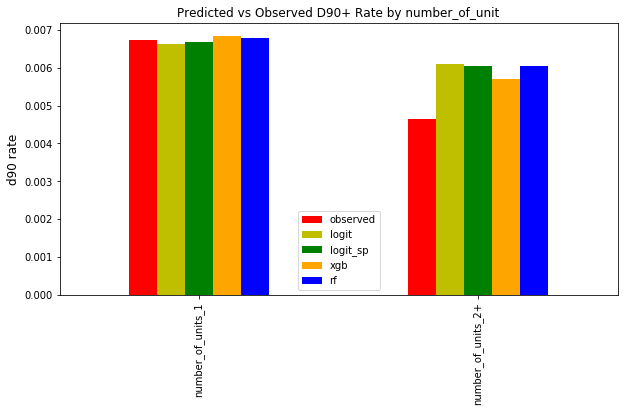

<Figure size 432x288 with 0 Axes>

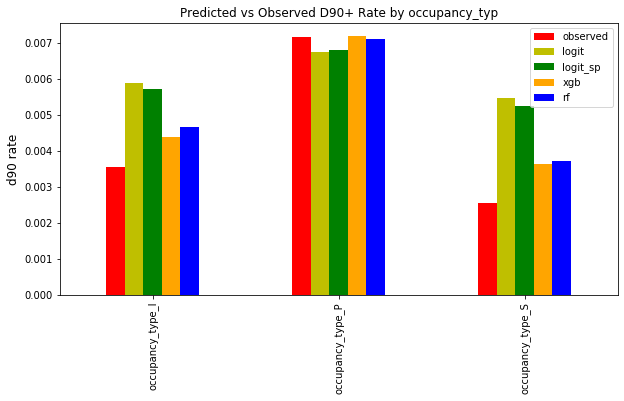

<Figure size 432x288 with 0 Axes>

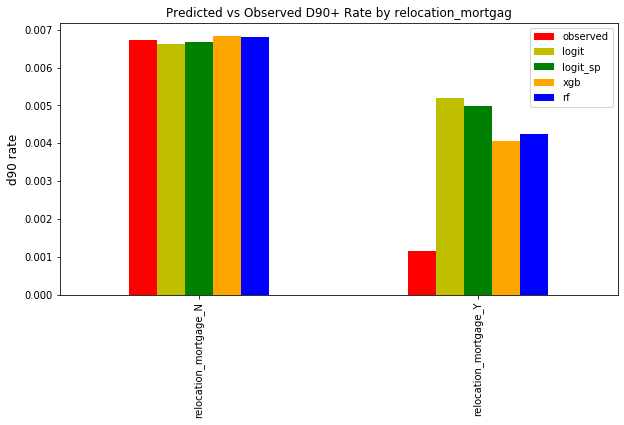

In [50]:
for li in category:
    cat_prob(li)

### Validation on other variables

In [147]:
df3 = pd.read_csv('Fannie/2018Q1/d60_90_flag.csv')

In [146]:
def clean_keepid(df2):
    df2 = df2.drop(columns=['seller_name','d60_flag',
                          'first_payment_date','origination_date',
                         'property_state','zip_code_short'])
    df2['loan_credit_score_orig'] = df2.apply(lambda x: min(x['borrower_credit_score_orig'],x['coborrower_credit_score_orig']), axis=1)
    df2 = df2.drop(columns=['primary_mortgage_insurance_percent','borrower_credit_score_orig','coborrower_credit_score_orig',
                         'mortgage_insurance_type','product_type'])
    df2.dropna(axis=0, how='any',inplace=True)
    df2 = df2.drop(columns = ['original_ltv'])
    df2['number_of_borrowers'] = df2['number_of_borrowers'].apply(lambda x: '1' if x == 1 else '2+')
    df2['number_of_units'] = df2['number_of_units'].apply(lambda x: '1' if x == 1 else '2+')

    categorical_cols = ['origination_channel','number_of_borrowers',
                        'first_time_home_buyer', 'loan_purpose', 'property_type', 
                        'number_of_units','occupancy_type', 'relocation_mortgage']

    df2=pd.get_dummies(df2,
                       prefix_sep='_',
                       drop_first=False,
                       columns=categorical_cols)
    try:
        df2 = df2.drop(columns = ['first_time_home_buyer_N','first_time_home_buyer_U'])
    except: df2 = df2.drop(columns = ['first_time_home_buyer_N'])
        
    return df2

In [148]:
df4 = clean_keepid(df3)

In [ ]:
prob = 

### Out of time validation on 2014, 2015, 2016

In [125]:
df2014 = pd.read_csv('Fannie/2014Q3/d60_90_flag2014q3.csv')
df2015 = pd.read_csv('Fannie/2015Q4/d60_90_flag2015q4.csv')
df2016 = pd.read_csv('Fannie/2016Q3/d60_90_flag2016q3.csv')

In [126]:
def clean(df2):
    df2 = df2.drop(columns=['loan_identifier','seller_name','d60_flag',
                          'first_payment_date','origination_date',
                         'property_state','zip_code_short'])
    df2['loan_credit_score_orig'] = df2.apply(lambda x: min(x['borrower_credit_score_orig'],x['coborrower_credit_score_orig']), axis=1)
    df2 = df2.drop(columns=['primary_mortgage_insurance_percent','borrower_credit_score_orig','coborrower_credit_score_orig',
                         'mortgage_insurance_type','product_type'])
    df2.dropna(axis=0, how='any',inplace=True)
    df2 = df2.drop(columns = ['original_ltv'])
    df2['number_of_borrowers'] = df2['number_of_borrowers'].apply(lambda x: '1' if x == 1 else '2+')
    df2['number_of_units'] = df2['number_of_units'].apply(lambda x: '1' if x == 1 else '2+')

    categorical_cols = ['origination_channel','number_of_borrowers',
                        'first_time_home_buyer', 'loan_purpose', 'property_type', 
                        'number_of_units','occupancy_type', 'relocation_mortgage']

    df2=pd.get_dummies(df2,
                       prefix_sep='_',
                       drop_first=False,
                       columns=categorical_cols)
    try:
        df2 = df2.drop(columns = ['first_time_home_buyer_N','first_time_home_buyer_U'])
    except: df2 = df2.drop(columns = ['first_time_home_buyer_N'])
        
    return df2

In [127]:
df2014 = clean(df2014)
df2015 = clean(df2015)
df2016 = clean(df2016)

In [142]:
def validation(df,year):     
    df.reset_index(inplace=True, drop = True)
    y = df['d90_flag']
    X = df.drop(columns = ['d90_flag'])

    ##logit model
    val_log = pd.concat([X,pd.DataFrame(logit_model.predict_proba(X))[[1]]],axis = 1)
    val_log.rename(columns = {1:'prob'}, inplace = True)

    ##logit model with sp
    df_sp = df.copy()

    df_sp['original_interest_rate_4.1'] = df_sp['original_interest_rate'].apply(lambda x: max(x-4.1,0))
    df_sp['original_interest_rate_5.0'] = df_sp['original_interest_rate'].apply(lambda x: max(x-5.0,0))

    df_sp['original_cltv_85'] = df_sp['original_cltv'].apply(lambda x: max(x-85,0))
    df_sp['original_cltv_95'] = df_sp['original_cltv'].apply(lambda x: max(x-95,0))

    df_sp['loan_credit_score_orig_695'] = df_sp['loan_credit_score_orig'].apply(lambda x: max(x-695,0))
    df_sp['loan_credit_score_orig_720'] = df_sp['loan_credit_score_orig'].apply(lambda x: max(x-720,0))

    y_sp = df_sp['d90_flag']
    X_sp = df_sp.drop(columns = ['d90_flag'])
    val_logsp = pd.concat([X_sp,pd.DataFrame(logit_model_sp.predict_proba(X_sp))[[1]]],axis = 1)
    val_logsp.rename(columns = {1:'prob'}, inplace = True)
    
    ##random forest
    val_rf = pd.concat([X,pd.DataFrame(rf_model.predict_proba(X))[[1]]],axis = 1)
    val_rf.rename(columns = {1:'prob'}, inplace = True)

    ##xgboost
    val_xgb = pd.concat([X,pd.DataFrame(xgb_model.predict_proba(X))[[1]]],axis = 1)
    val_xgb.rename(columns = {1:'prob'}, inplace = True)
    
    ##put together and visualize
    continuous = ['original_interest_rate', 'original_upb', 'original_cltv', 
             'original_dti', 'loan_credit_score_orig']
    for col in continuous:
        plt.subplot(111)
        a = val_log.groupby(pd.qcut(val_log[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        plt.plot(a[col],a['prob'], c= 'y', label='logit_predict')

        c = val_logsp.groupby(pd.qcut(val_logsp[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        plt.plot(c[col],c['prob'], c= 'g', label='logit_sp_predict')

        d = val_xgb.groupby(pd.qcut(val_xgb[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        plt.plot(d[col],d['prob'], c= 'orange', label='xbg_predict')

        e = val_rf.groupby(pd.qcut(val_rf[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        plt.plot(e[col],e['prob'], c= 'b', label='rf_predict')

        #f = val_svm.groupby(pd.qcut(val_svm[col],20,duplicates = 'drop'))[[col, 'prob']].mean()
        #plt.plot(f[col],f['prob'], c= 'purple', label='svm_predict') 

        b = df.groupby(pd.qcut(df[col],20,duplicates = 'drop'))[[col, 'd90_flag']].mean()
        plt.plot(b[col],b['d90_flag'], c= 'r', label = 'observed')

        #plt.savefig("figs/bivariate_analysis/count_vs_" + col + ".png")
        plt.title("Predicted vs Observed D90+ Rate by " + col)
        plt.legend()
        plt.xlabel(col, fontsize =12)
        plt.ylabel('d90 rate',fontsize =12)
        plt.savefig("figs/first/d90_vs_" + col + ' validation on' + str(year) + ".png")
        plt.show()
    
    category = [['origination_channel_B', 'origination_channel_C',
       'origination_channel_R'], ['number_of_borrowers_1',
       'number_of_borrowers_2+'], ['first_time_home_buyer_Y'], ['loan_purpose_C',
       'loan_purpose_P', 'loan_purpose_R'], ['property_type_CO',
       'property_type_CP', 'property_type_MH', 'property_type_PU',
       'property_type_SF'], ['number_of_units_1', 'number_of_units_2+'],
       ['occupancy_type_I', 'occupancy_type_P', 'occupancy_type_S'],
       ['relocation_mortgage_N', 'relocation_mortgage_Y']]
    
    for li in category:
        med = {}
        med['observed'] = []
        med['logit'] = []
        med['logit_sp'] = []
        med['xgb'] = []
        med['rf'] = []
        for i in li:
            med['observed'].append(df.groupby([i],as_index=False)[['d90_flag']].mean().iloc[1,1])
            med['logit'].append(val_log[val_log[i]==1]['prob'].mean())
            med['logit_sp'].append(val_logsp[val_logsp[i]==1]['prob'].mean())
            med['xgb'].append(val_xgb[val_xgb[i]==1]['prob'].mean())
            med['rf'].append(val_rf[val_rf[i]==1]['prob'].mean()) 


        df_med = pd.DataFrame(med, index=li) 

        plt.figure()
        df_med.plot(kind = 'bar',color = ['r','y','g','orange','b'], figsize = (10,5))
        plt.title("Predicted vs Observed D90+ Rate by "+li[0][:-3])
        plt.ylabel('d90 rate',fontsize =12)
        #plt.savefig("figs/first/d90_vs_" + li[0][:-3] + ".png")
        plt.show()
        
    return 
    

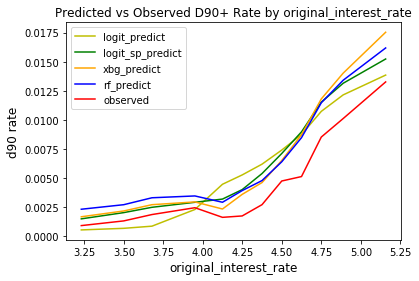

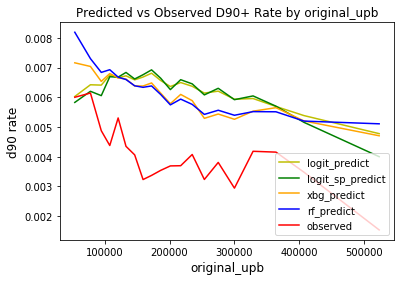

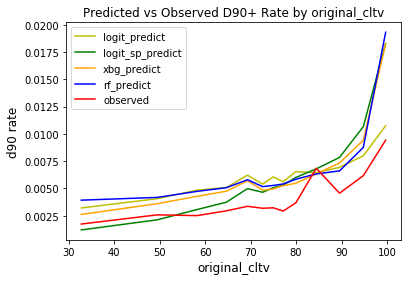

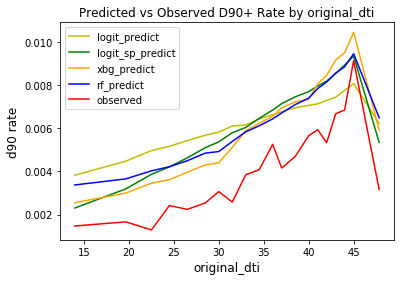

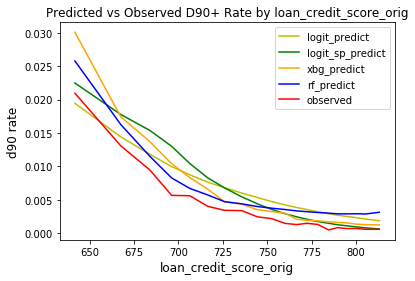

<Figure size 432x288 with 0 Axes>

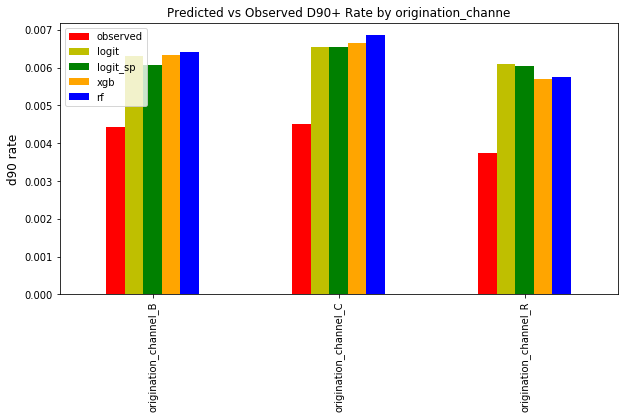

<Figure size 432x288 with 0 Axes>

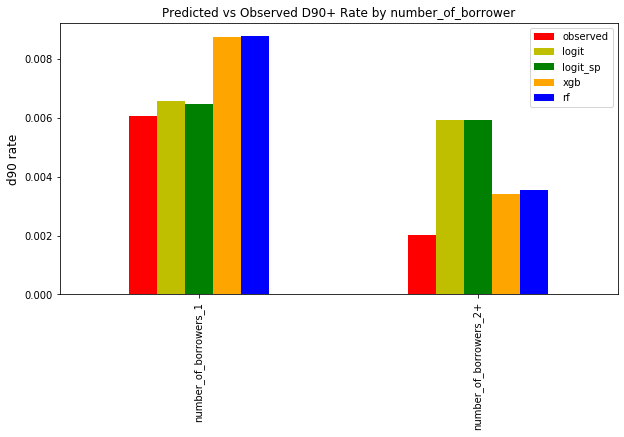

<Figure size 432x288 with 0 Axes>

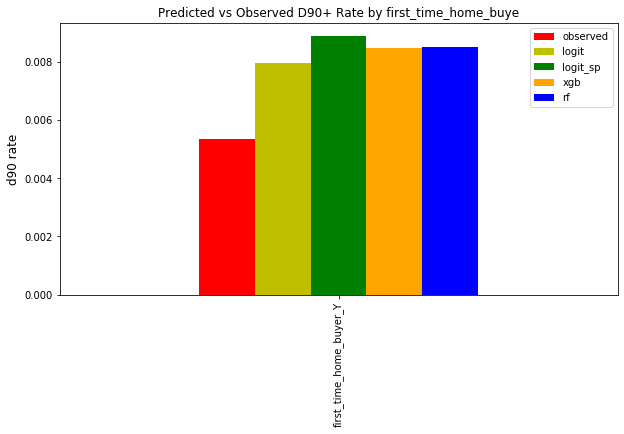

<Figure size 432x288 with 0 Axes>

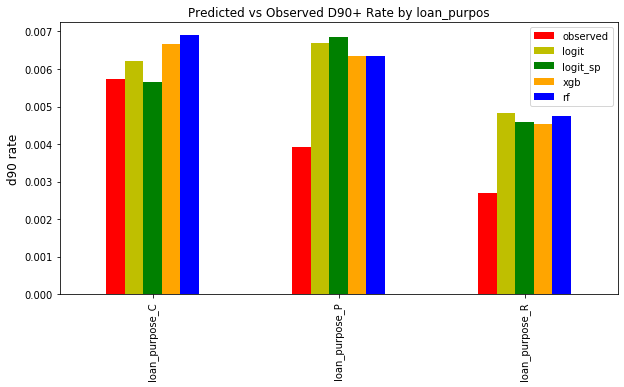

<Figure size 432x288 with 0 Axes>

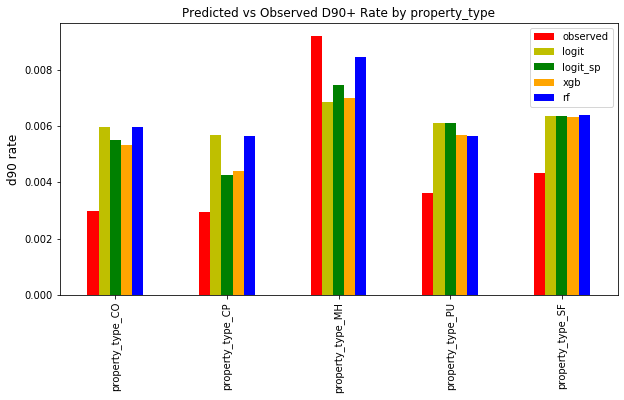

<Figure size 432x288 with 0 Axes>

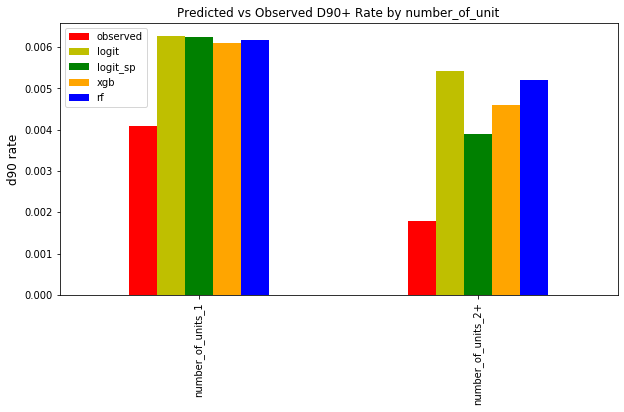

<Figure size 432x288 with 0 Axes>

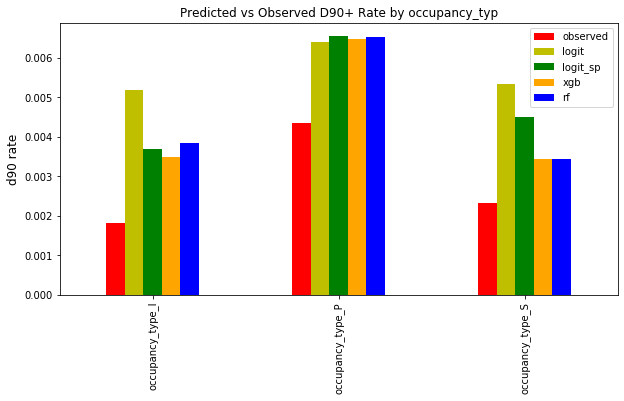

<Figure size 432x288 with 0 Axes>

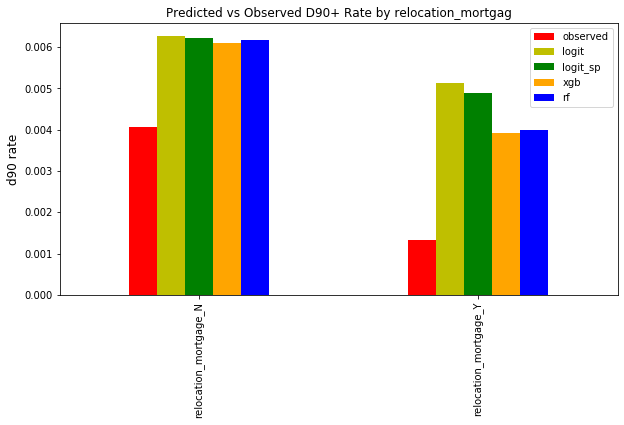

In [143]:
validation(df2014, 2014)

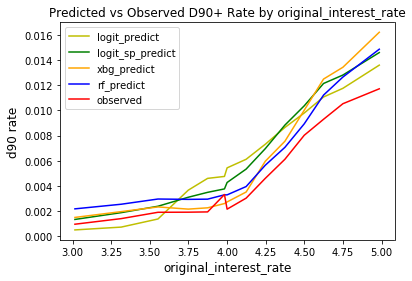

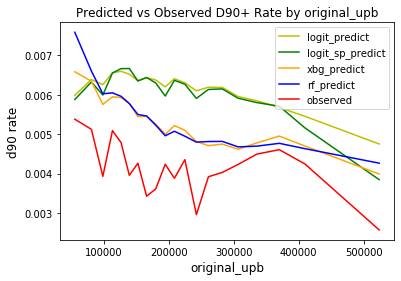

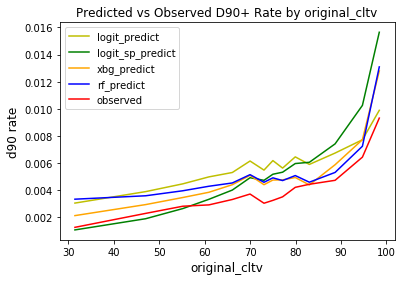

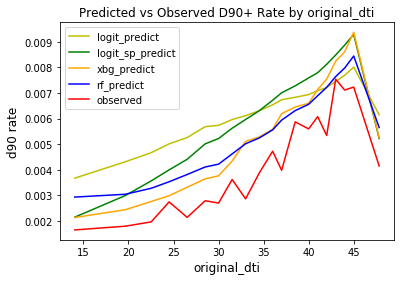

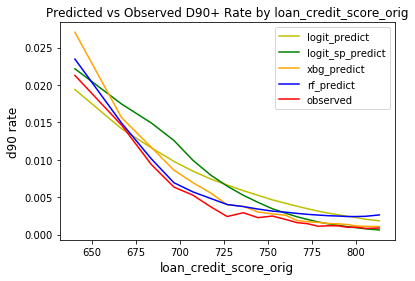

<Figure size 432x288 with 0 Axes>

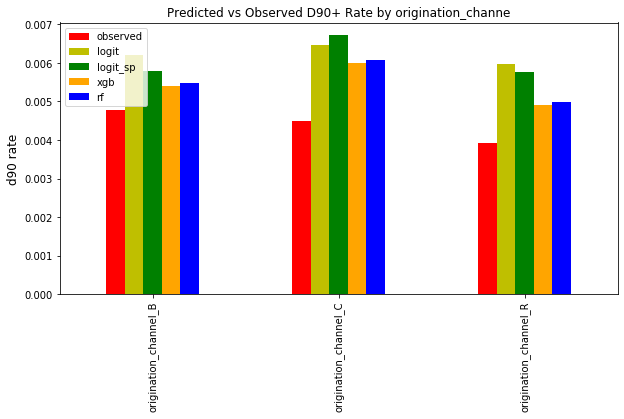

<Figure size 432x288 with 0 Axes>

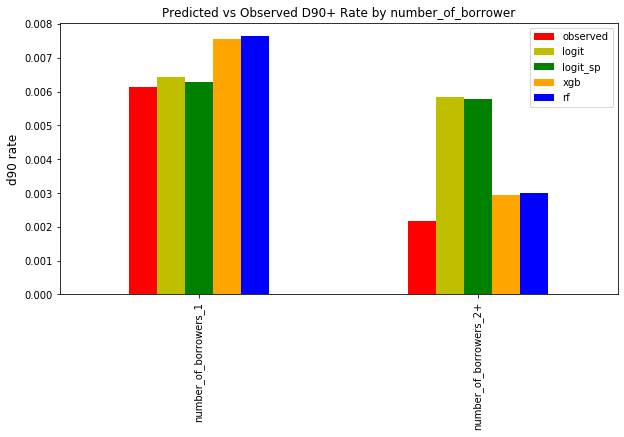

<Figure size 432x288 with 0 Axes>

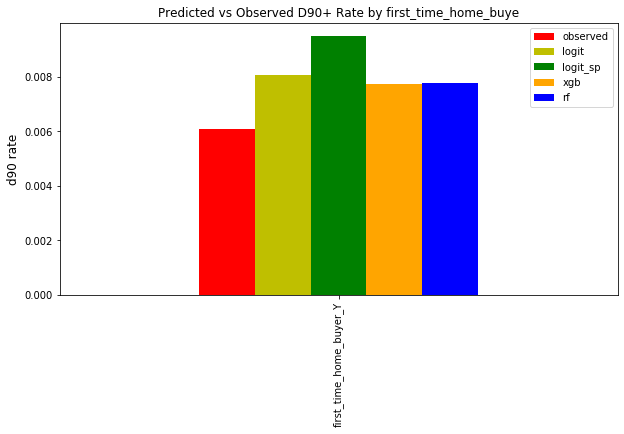

<Figure size 432x288 with 0 Axes>

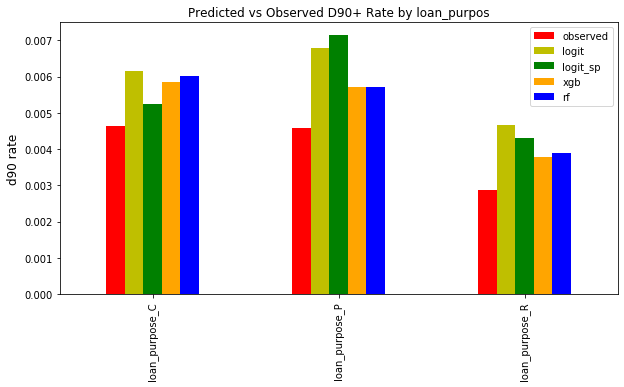

<Figure size 432x288 with 0 Axes>

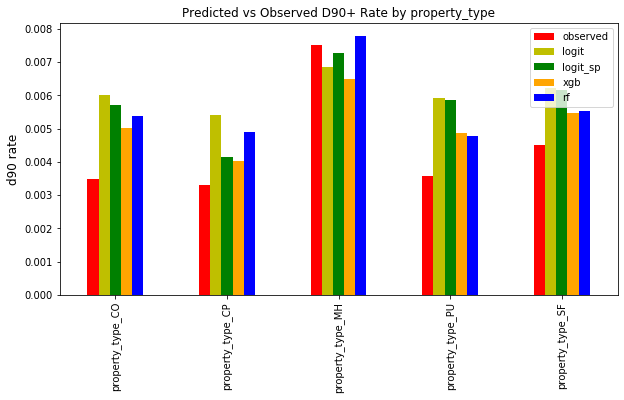

<Figure size 432x288 with 0 Axes>

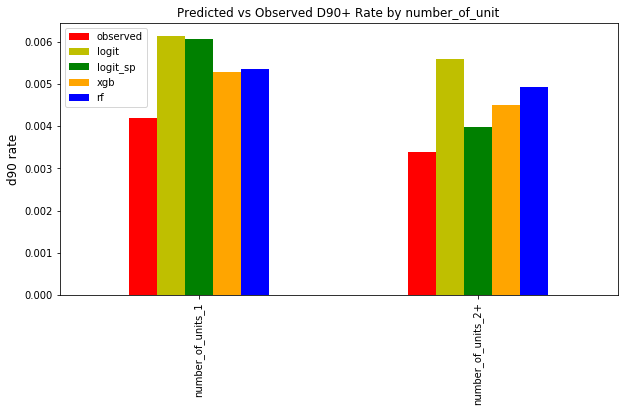

<Figure size 432x288 with 0 Axes>

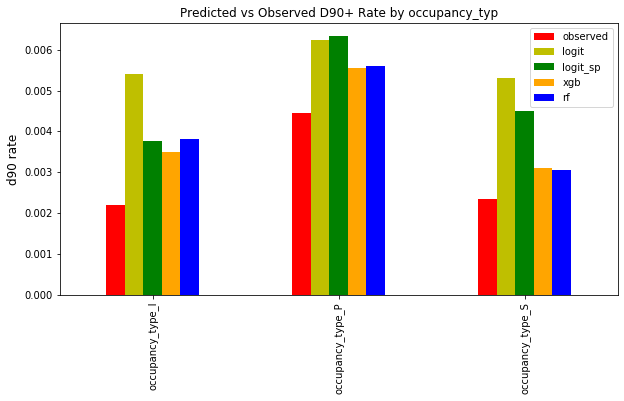

<Figure size 432x288 with 0 Axes>

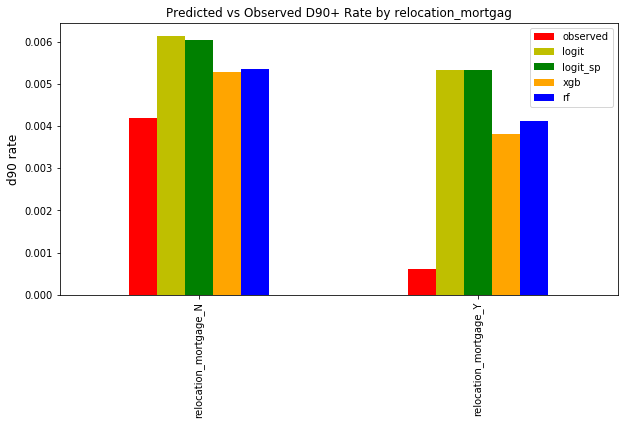

In [144]:
validation(df2015, 2015)

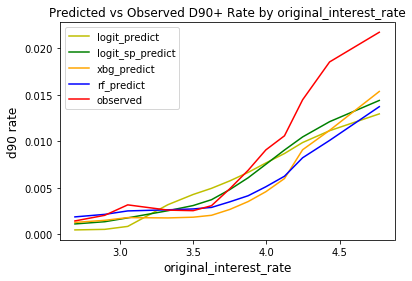

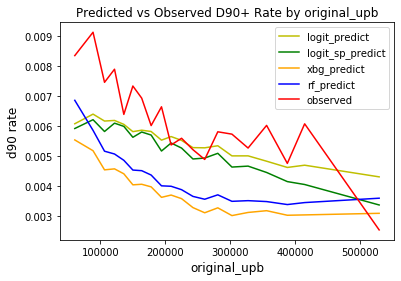

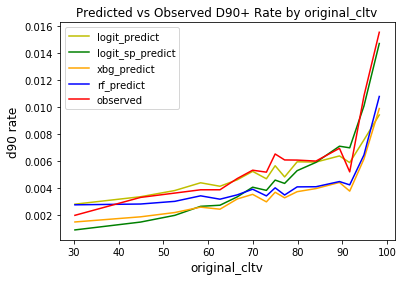

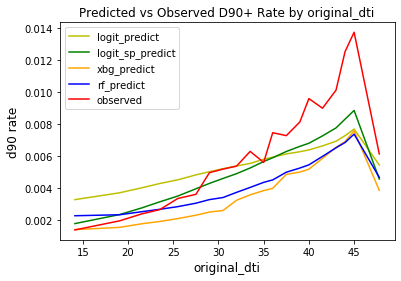

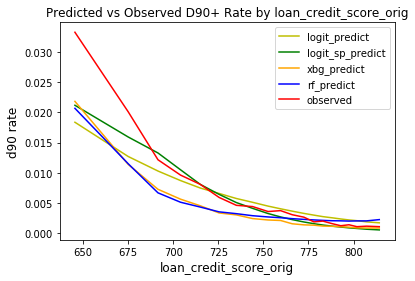

<Figure size 432x288 with 0 Axes>

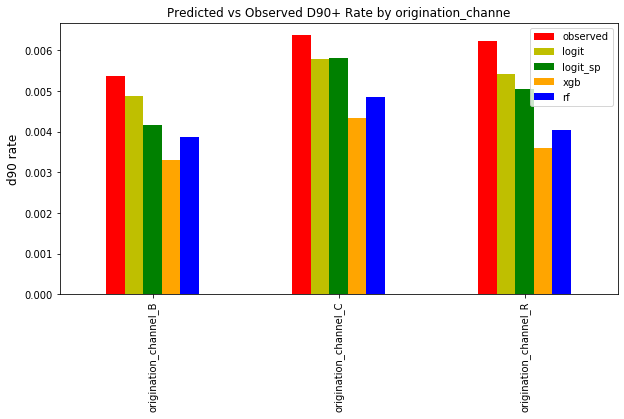

<Figure size 432x288 with 0 Axes>

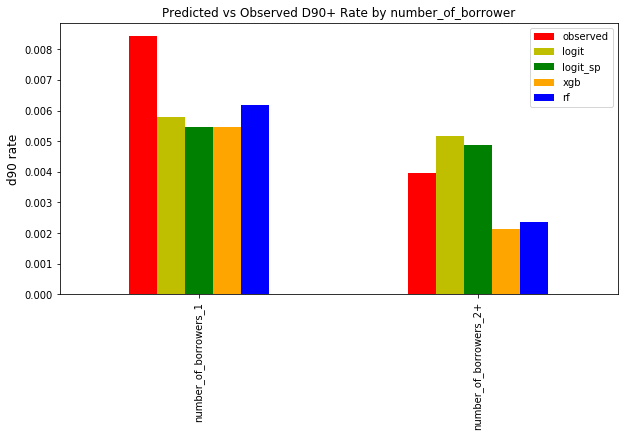

<Figure size 432x288 with 0 Axes>

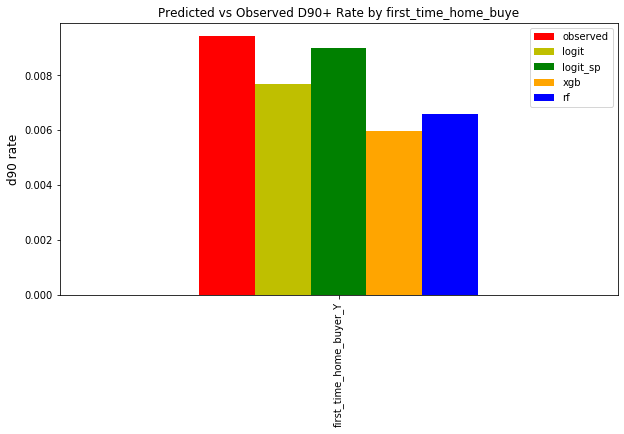

<Figure size 432x288 with 0 Axes>

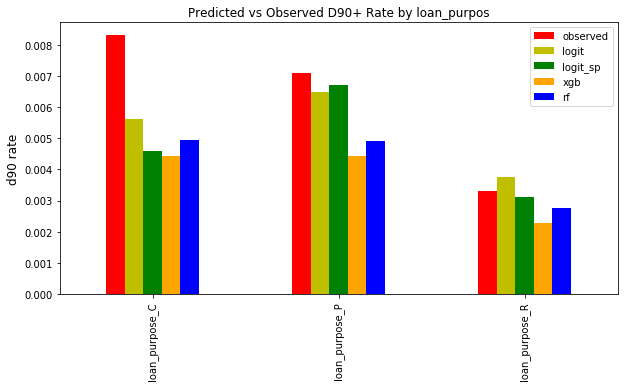

<Figure size 432x288 with 0 Axes>

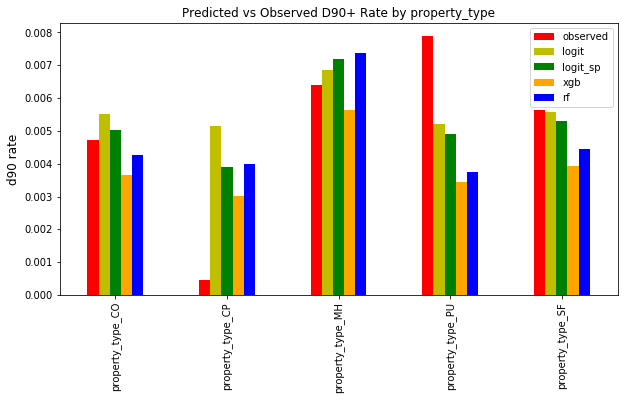

<Figure size 432x288 with 0 Axes>

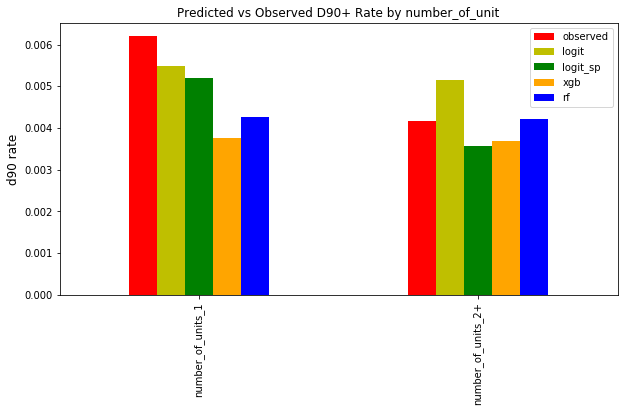

<Figure size 432x288 with 0 Axes>

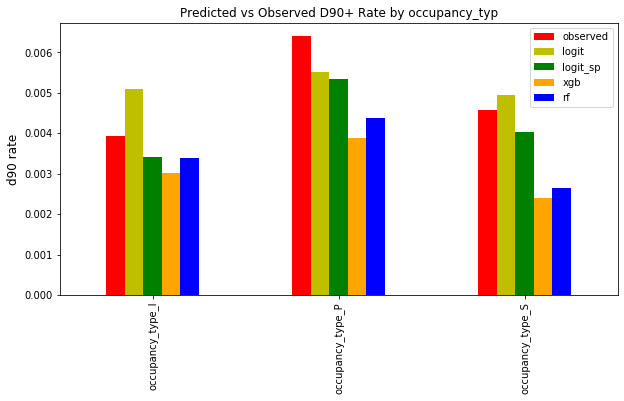

<Figure size 432x288 with 0 Axes>

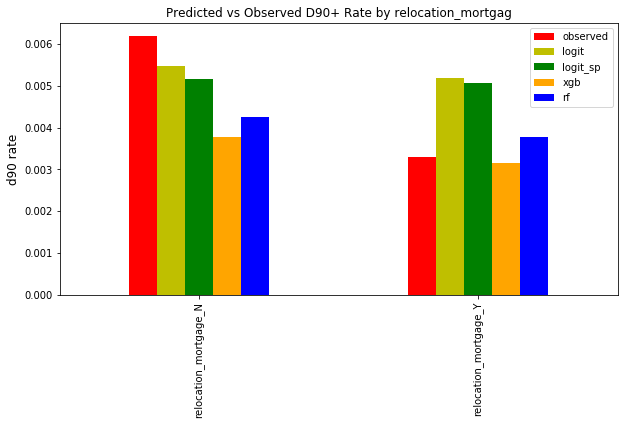

In [145]:
validation(df2016, 2016)

In [139]:
def comparision(df):
    df.reset_index(inplace=True, drop = True)
    y = df['d90_flag']
    X = df.drop(columns = ['d90_flag'])
    
    df_sp = df.copy()

    df_sp['original_interest_rate_4.1'] = df_sp['original_interest_rate'].apply(lambda x: max(x-4.1,0))
    df_sp['original_interest_rate_5.0'] = df_sp['original_interest_rate'].apply(lambda x: max(x-5.0,0))

    df_sp['original_cltv_85'] = df_sp['original_cltv'].apply(lambda x: max(x-85,0))
    df_sp['original_cltv_95'] = df_sp['original_cltv'].apply(lambda x: max(x-95,0))

    df_sp['loan_credit_score_orig_695'] = df_sp['loan_credit_score_orig'].apply(lambda x: max(x-695,0))
    df_sp['loan_credit_score_orig_720'] = df_sp['loan_credit_score_orig'].apply(lambda x: max(x-720,0))

    y_sp = df_sp['d90_flag']
    X_sp = df_sp.drop(columns = ['d90_flag'])

    # Below for loop iterates through your models list
    for name, model in model_list.items():
        if name == 'logit_model_sp':
            a = X_sp
        elif name == 'svm_model':
            continue  
        else: a = X
    # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y, model.predict_proba(a)[:,1])
    # Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y,model.predict_proba(a)[:,1])
    # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   # Display
    return 

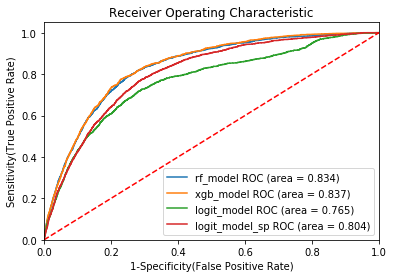

In [140]:
comparision(df2014)

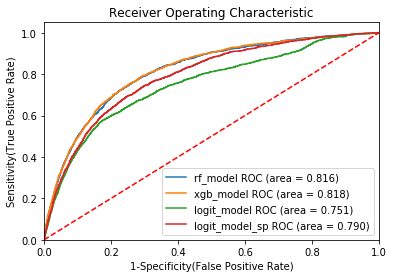

In [149]:
comparision(df2015)

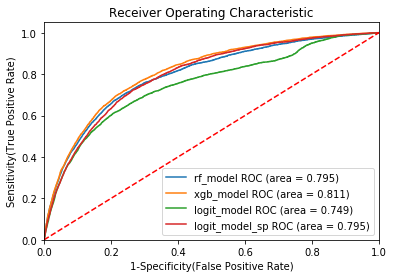

In [141]:
comparision(df2016)

## Model Comparison

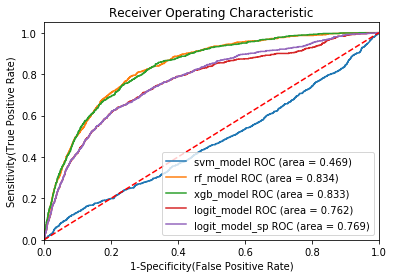

In [39]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()

# Below for loop iterates through your models list
for name, model in model_list.items():
    if name == 'logit_model_sp':
        a = X_test_sp
    elif name == 'svm_model':
        a = X_test_nor 
    else: a = X_test
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(a)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(a)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [40]:
auc = pd.DataFrame()
for name, model in model_list.items():
    if name == 'logit_model_sp':
        train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train_sp)[:,1])
        test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_sp)[:,1])
    elif name == 'svm_model':
        train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train_nor)[:,1])
        test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_nor)[:,1])  
    else:
        train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
        test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    auc.at[name, "train_auc"] = '{0:.2f}'.format(train_auc)
    auc.at[name, "test_auc"] = '{0:.2f}'.format(test_auc)
auc



,train_auc,test_auc
svm_model,0.49,0.47
rf_model,0.89,0.83
xgb_model,0.84,0.83
logit_model,0.77,0.76
logit_model_sp,0.77,0.77


## Feature Importance

In [306]:
def feature(name, model, X_train):
    series = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(len(X_train.columns))
    series.plot(kind='barh')
    plt.title("Feature Importance of "+name, fontsize=15)
    plt.show()

#### Logistic model

In [120]:
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return coefs, p

In [129]:
coefs, p = logit_pvalue(logit_model, X_train)
X_cols_inc = X.columns.tolist()
X_cols_inc.insert(0,'Intercept')
p_value = pd.DataFrame({'feature':X_cols_inc, 'coeffienct':coefs, 'P_value':p.round(6)})
p_value 

/Users/jingsixu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


,feature,coeffienct,P_value
0,Intercept,2.748000e-06,NaN
1,original_interest_rate,1.419897e-04,0.998271
2,original_upb,-1.024091e-06,0.000001
3,original_loan_term,1.275328e-02,0.000000
4,original_cltv,3.228936e-03,0.072464
5,original_dti,1.537183e-03,0.554548
6,loan_credit_score_orig,-1.305587e-02,0.000000
7,origination_channel_B,2.179449e-06,NaN
8,origination_channel_C,3.175544e-05,NaN
9,origination_channel_R,-3.118689e-05,NaN


In [339]:
coefs, p = logit_pvalue(logit_model_sp, X_train_sp)
X_cols_inc = X_sp.columns.tolist()
X_cols_inc.insert(0,'Intercept')
p_value = pd.DataFrame({'feature':X_cols_inc, 'coeffienct':coefs, 'P_value':p.round(6)})
p_value 

/Users/jingsixu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/jingsixu/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


,feature,coeffienct,P_value
0,Intercept,2.095667e-06,NaN
1,original_interest_rate,1.300344e-04,0.998419
2,original_upb,-1.033752e-06,0.000001
3,original_loan_term,1.175324e-02,0.000000
4,original_cltv,2.980065e-03,0.166751
5,original_dti,1.413676e-03,0.589923
6,loan_credit_score_orig,-1.238723e-02,0.000000
7,origination_channel_B,2.019926e-06,NaN
8,origination_channel_C,2.960551e-05,NaN
9,origination_channel_R,-2.952975e-05,NaN


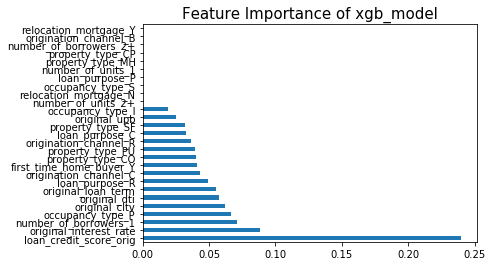

In [307]:
for name, model in model_list.items():
    if name == 'xgb_model' or name =='rf_model':
        feature(name, model, X_train)

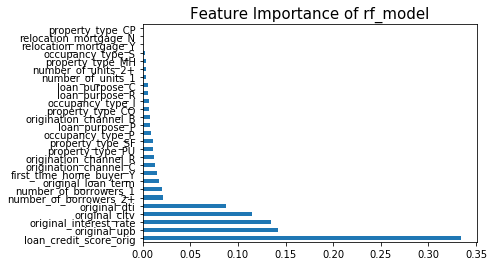

In [308]:
feature('rf_model', rf_model, X_train)

## Check drop one for one hot encode

In [120]:
df2 = pd.read_csv('Fannie/2018Q1/d60_90_flag.csv')
df2 = df2.drop(columns=['loan_identifier','seller_name','d60_flag',
                      'first_payment_date','origination_date',
                     'property_state','zip_code_short'])
df2['loan_credit_score_orig'] = df2.apply(lambda x: min(x['borrower_credit_score_orig'],x['coborrower_credit_score_orig']), axis=1)
df2 = df2.drop(columns=['primary_mortgage_insurance_percent','borrower_credit_score_orig','coborrower_credit_score_orig',
                     'mortgage_insurance_type','product_type'])
df2.dropna(axis=0, how='any',inplace=True)
df2 = df2.drop(columns = ['original_ltv'])
df2['number_of_borrowers'] = df2['number_of_borrowers'].apply(lambda x: '1' if x == 1 else '2+')
df2['number_of_units'] = df2['number_of_units'].apply(lambda x: '1' if x == 1 else '2+')

categorical_cols = ['origination_channel','number_of_borrowers',
                    'first_time_home_buyer', 'loan_purpose', 'property_type', 
                    'number_of_units','occupancy_type', 'relocation_mortgage']

df2=pd.get_dummies(df2,
                   prefix_sep='_',
                   drop_first=True,
                   columns=categorical_cols)

df2 = df2.drop(columns = [
       'first_time_home_buyer_U'])

In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV
df2.reset_index(inplace=True, drop = True)
y = df2['d90_flag']
X = df2.drop(columns = ['d90_flag'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [122]:
%%time
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
logit_model2 = LogisticRegression(**grid.best_params_)
logit_model2.fit(X_train, y_train)

{'C': 0.01}
CPU times: user 15.2 s, sys: 714 ms, total: 15.9 s
Wall time: 14 s


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
def prob(a):
    prob = 1 / (1 + math.exp(-a))
    return prob

predict = X * logit_model2.coef_

predict['prob'] = pd.DataFrame(logit_model2.predict_proba(X))[1]

predict['self_cal'] = predict.apply(sum, axis = 1)
predict['self_cal'] = predict['self_cal']+float(logit_model2.intercept_)
predict['self_cal'] = predict['self_cal'].apply(prob)

predict['d90_flag'] = y 

In [124]:
predict

,original_interest_rate,original_upb,original_loan_term,original_cltv,original_dti,loan_credit_score_orig,origination_channel_C,origination_channel_R,number_of_borrowers_2+,first_time_home_buyer_Y,...,property_type_MH,property_type_PU,property_type_SF,number_of_units_2+,occupancy_type_P,occupancy_type_S,relocation_mortgage_Y,prob,self_cal,d90_flag
0,0.000603,-0.463941,4.590680,0.209858,0.043036,-10.326529,0.000000,-0.000031,-0.000000,0.000000,...,0.0,-0.000005,0.000000,-0.0,0.000024,-0.0,-0.0,0.002609,0.002615,0
1,0.000603,-0.272424,4.590680,0.258287,0.063017,-9.608502,0.000032,-0.000000,-0.000079,0.000000,...,0.0,-0.000005,0.000000,-0.0,0.000024,-0.0,-0.0,0.006906,0.006954,0
2,0.000566,-0.238627,4.590680,0.255058,0.073777,-8.681595,0.000000,-0.000031,-0.000079,0.000000,...,0.0,-0.000000,0.000015,-0.0,0.000024,-0.0,-0.0,0.017982,0.018302,0
3,0.000603,-0.188444,4.590680,0.258287,0.073777,-10.013208,0.000000,-0.000031,-0.000000,0.000053,...,0.0,-0.000005,0.000000,-0.0,0.000024,-0.0,-0.0,0.005076,0.005101,0
4,0.000603,-0.247845,4.590680,0.158201,0.033814,-9.491007,0.000000,-0.000031,-0.000000,0.000000,...,0.0,-0.000000,0.000015,-0.0,0.000024,-0.0,-0.0,0.006995,0.007044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425759,0.000603,-0.115729,4.590680,0.200172,0.023055,-9.425731,0.000000,-0.000031,-0.000079,0.000000,...,0.0,-0.000000,0.000015,-0.0,0.000024,-0.0,-0.0,0.008775,0.008852,0
425760,0.000532,-0.325680,4.590680,0.306716,0.067629,-9.752107,0.000000,-0.000000,-0.000000,0.000053,...,0.0,-0.000005,0.000000,-0.0,0.000024,-0.0,-0.0,0.005987,0.006023,0
425761,0.000568,-0.182299,4.590680,0.258287,0.072240,-9.543227,0.000032,-0.000000,-0.000000,0.000000,...,0.0,-0.000005,0.000000,-0.0,0.000024,-0.0,-0.0,0.008133,0.008199,0
425762,0.000603,-0.131091,3.060453,0.193715,0.056869,-10.013208,0.000000,-0.000031,-0.000079,0.000000,...,0.0,-0.000000,0.000015,-0.0,0.000024,-0.0,-0.0,0.001077,0.001078,0
